In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from tensorflow.keras.utils import to_categorical


Import library yang dibutuhkan untuk neural network

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Membaca data pada gdribe

In [109]:
folder_id = "1Vd9xvZfay0rlNpfmzDXOl_5f3_M6zJtk?usp=sharing"
folder_path = f"/content/drive/My Drive/{folder_id}"

Path dataset

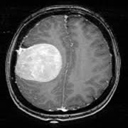

In [110]:
# Specify the path to the image in your Google Drive
image_path_colab = '/content/drive/My Drive/brain_tumor_dataset/yes/Y1.jpg'

# Open and resize the image
im = Image.open(image_path_colab).resize((128, 128))
im

contoh image pada dataset

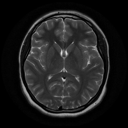

In [111]:
# Specify the path to the image in your Google Drive
image_path_colab = '/content/drive/My Drive/brain_tumor_dataset/no/1 no.jpeg'

# Open and resize the image
im = Image.open(image_path_colab).resize((128, 128))
im

contoh image pada dataset

In [112]:
image_path_colab_yes = '/content/drive/My Drive/brain_tumor_dataset/yes/'
image_path_colab_no = '/content/drive/My Drive/brain_tumor_dataset/no/'

yes=os.listdir(image_path_colab_yes)
no=os.listdir(image_path_colab_no)

membagi path pada folder dataset

In [113]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

menggunakan NumPy untuk menggabungkan dua larik, yaitu yes dan no, ke dalam satu larik yang disebut data. Ekspresi len(data) == len(yes) + len(no) memeriksa apakah panjang larik gabungan data sama dengan jumlah panjang larik individu yes dan no. Fungsi len() mengembalikan jumlah elemen dalam suatu larik atau daftar

In [114]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

kode ini bertujuan untuk membuat target atau label untuk data yang sudah digabungkan sebelumnya (yes dan no). Dalam konteks ini, label "1" ditetapkan untuk setiap elemen dalam larik yes, sedangkan label "0" ditetapkan untuk setiap elemen dalam larik no. Setelah itu, label-label ini digabungkan ke dalam satu larik yang disebut data_target. Ekspresi len(data_target) == len(target_x) + len(target_y) digunakan untuk memastikan bahwa panjang larik gabungan data_target sama dengan jumlah panjang larik individu target_x dan target_y.

In [115]:
len(data_target)==len(data)

True

 digunakan untuk memeriksa apakah panjang larik label data_target sama dengan panjang larik data data. Dalam konteks ini, setelah label-label (target) dibuat untuk setiap elemen dalam larik data yang digabungkan (yes dan no), ekspresi ini memastikan bahwa jumlah elemen dalam larik label sesuai dengan jumlah elemen dalam larik data.

In [116]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:
data

array(['Y108.jpg', 'Y107.jpg', 'Y1.jpg', 'Y106.jpg', 'Y10.jpg',
       'Y105.jpg', 'Y103.jpg', 'Y102.jpg', 'Y101.jpg', 'Y104.jpg',
       'Y100.JPG', 'Y11.jpg', 'Y113.JPG', 'Y116.JPG', 'Y109.JPG',
       'Y117.JPG', 'Y111.JPG', 'Y112.JPG', 'Y167.JPG', 'Y163.JPG',
       'Y161.JPG', 'Y160.JPG', 'Y16.JPG', 'Y162.jpg', 'Y159.JPG',
       'Y157.JPG', 'Y155.JPG', 'Y158.JPG', 'Y156.JPG', 'Y154.jpg',
       'Y153.jpg', 'Y15.jpg', 'Y13.jpg', 'Y148.JPG', 'Y147.JPG',
       'Y146.JPG', 'Y14.jpg', 'Y12.jpg', 'Y120.JPG', 'Y114.JPG',
       'Y115.JPG', 'Y243.JPG', 'Y245.jpg', 'Y244.JPG', 'Y247.JPG',
       'Y242.JPG', 'Y24.jpg', 'Y21.jpg', 'Y23.JPG', 'Y22.jpg', 'Y20.jpg',
       'Y193.JPG', 'Y2.jpg', 'Y195.JPG', 'Y194.jpg', 'Y19.JPG',
       'Y184.JPG', 'Y185.jpg', 'Y187.jpg', 'Y192.JPG', 'Y188.jpg',
       'Y186.jpg', 'Y181.jpg', 'Y183.jpg', 'Y182.JPG', 'Y169.jpg',
       'Y170.JPG', 'Y165.JPG', 'Y168.jpg', 'Y180.jpg', 'Y17.jpg',
       'Y18.JPG', 'Y166.JPG', 'Y164.JPG', 'Y38.jpg', 'Y37.jpg', 'Y39

setelah membaca data dengan pembagian yes dan no

In [118]:
image_path_colab_yes_values = '/content/drive/My Drive/brain_tumor_dataset/yes/'
image_path_colab_no_values = '/content/drive/My Drive/brain_tumor_dataset/no/'


yes_values=os.listdir(image_path_colab_yes_values)
no_values=os.listdir(image_path_colab_no_values)

In [119]:
for file in yes_values[:5]:  # Print the first 5 filenames for inspection
    print(file)

Y108.jpg
Y107.jpg
Y1.jpg
Y106.jpg
Y10.jpg


In [120]:
import os

X_data = []

# Assuming your script is in the same directory as "input"
base_path = os.path.abspath('/content/drive/My Drive/brain_tumor_dataset/')

for file in yes_values:
    file_path = os.path.join(base_path, 'yes', file)
    img = cv2.imread(file_path)

    # Check if the image is successfully loaded
    if img is not None:
        # Check if the image dimensions are valid
        if img.size != 0 and img.shape[:2] != (0, 0):
            print(f"Image dimensions for {file_path}: {img.shape}")
            face = cv2.resize(img, (32, 32))
            (b, g, r) = cv2.split(face)
            img = cv2.merge([r, g, b])
            X_data.append(img)
        else:
            print(f"Invalid image dimensions for {file_path}")
    else:
        print(f"Error loading or empty image: {file_path}")

# Continue with the rest of your code or additional debugging...
print(f"Number of images loaded: {len(X_data)}")

Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y108.jpg: (1200, 1059, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y107.jpg: (512, 512, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y1.jpg: (218, 180, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y106.jpg: (253, 200, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y10.jpg: (360, 319, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y105.jpg: (246, 205, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y103.jpg: (993, 825, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y102.jpg: (630, 587, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y101.jpg: (336, 300, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y104.jpg: (890, 700, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/yes/Y1

membaca dan memproses gambar-gambar yang terletak dalam direktori 'yes' pada dataset tumor otak. Pertama-tama, list kosong X_data diinisialisasi untuk menyimpan data gambar yang akan diproses, dan path ke direktori utama dataset disetel sebagai base_path. Selanjutnya, sebuah loop dibuat untuk iterasi melalui daftar nama file gambar yang terdapat dalam variabel yes_values.

Pada setiap iterasi, path lengkap menuju file gambar dibangun menggunakan path dasar dan nama file, dan gambar tersebut dibaca menggunakan OpenCV. Kode kemudian melakukan beberapa pemeriksaan untuk memastikan keberhasilan pembacaan gambar dan validitas dimensinya. Jika pembacaan berhasil dan dimensi gambar valid, gambar tersebut diubah ukurannya menjadi 32x32 piksel dan saluran warnanya diubah untuk memastikan urutan warna yang benar.

Gambar yang telah diproses ditambahkan ke dalam list X_data. Namun, jika gambar tidak valid atau pembacaan gagal, pesan kesalahan sesuai dengan kondisinya akan dicetak. Setelah semua gambar selesai diproses, jumlah total gambar yang berhasil dimuat ke dalam list X_data dicetak untuk memberikan informasi mengenai ukuran dataset yang telah diolah.

Kode ini berfungsi sebagai langkah awal dalam persiapan data untuk melatih model pembelajaran mesin pada dataset tumor otak.

In [121]:
# Process "no" images
for file in no_values:
    file_path = os.path.join(base_path, 'no', file)
    img = cv2.imread(file_path)

    # Check if the image is successfully loaded
    if img is not None:
        # Check if the image dimensions are valid
        if img.size != 0 and img.shape[:2] != (0, 0):
            print(f"Image dimensions for {file_path}: {img.shape}")
            face = cv2.resize(img, (32, 32))
            (b, g, r) = cv2.split(face)
            img = cv2.merge([r, g, b])
            X_data.append(img)
        else:
            print(f"Invalid image dimensions for {file_path}")
    else:
        print(f"Error loading or empty image: {file_path}")

Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/23 no.jpg: (242, 208, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/21 no.jpg: (225, 225, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/20 no.jpg: (259, 194, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/22 no.jpg: (243, 207, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/17 no.jpg: (231, 218, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/19 no.jpg: (200, 200, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/18 no.jpg: (221, 228, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/14 no.jpg: (197, 177, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/15 no.jpg: (217, 232, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/2 no.jpeg: (630, 630, 3)
Image dimensions for /content/drive/My Drive/brain_tumor_dataset/no/13

untuk subfolder no

In [122]:
# Continue with the rest of your code or additional analysis...
print(f"Number of 'yes' and 'no' images loaded: {len(X_data)}")

Number of 'yes' and 'no' images loaded: 253


In [123]:
len(X_data)==len(data)==len(data_target)

True

In [124]:
X = np.squeeze(X_data)

In [125]:
X.shape

(253, 32, 32, 3)

In [126]:
# normalize data
X = X.astype('float32')
X /= 255

Menormalisasi pada data

In [127]:
categorical_labels = to_categorical(data_target, num_classes=2)

untuk mengonversi larik label kategori (data_target) menjadi representasi one-hot encoding. One-hot encoding adalah teknik di mana setiap label kategori direpresentasikan sebagai vektor biner, dengan satu elemen aktif yang menunjukkan kelas yang sesuai dan elemen-elemen lainnya bernilai nol.

In [128]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

membagi antara data latih, data uji

In [130]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 8, 8, 16)         

Kode tersebut mendefinisikan sebuah model neural network menggunakan TensorFlow dan Keras. Model ini memiliki struktur yang terdiri dari beberapa lapisan konvolusi (Conv2D), lapisan penurunan (MaxPooling2D dan Dropout), lapisan datar (Flatten), dan lapisan-lapisan Dense (fully connected). Mari kita jelaskan struktur model ini secara lebih rinci.

Model dimulai dengan lapisan konvolusi pertama dengan 16 filter, ukuran kernel 9x9, dan fungsi aktivasi ReLU. Lapisan konvolusi ini diikuti oleh lapisan penurunan maksimum (MaxPooling2D) dengan ukuran pool 2x2 untuk mengurangi dimensi data. Kemudian, diterapkan lapisan penurunan (Dropout) dengan tingkat dropout sebesar 0.45, yang membantu mencegah overfitting dengan mengabaikan sejumlah unit selama pelatihan.

Langkah-langkah ini diulang untuk dua lapisan konvolusi dan lapisan-lapisan penurunan selanjutnya, dengan penyesuaian pada jumlah filter dan tingkat dropout. Setelahnya, model menggunakan lapisan datar (Flatten) untuk meratakan tensor hasil konvolusi menjadi vektor satu dimensi.

Selanjutnya, terdapat lapisan Dense (fully connected) dengan 512 unit dan fungsi aktivasi ReLU, diikuti lagi oleh lapisan Dropout dengan tingkat dropout sebesar 0.15. Lapisan ini bertujuan untuk mengintegrasikan informasi yang telah dipelajari selama proses konvolusi.

Terakhir, model memiliki lapisan Dense dengan satu unit dan fungsi aktivasi sigmoid. Fungsi sigmoid digunakan untuk tugas klasifikasi biner dan menghasilkan probabilitas output antara 0 dan 1.

Ketika model tersebut dijalankan dengan model.summary(), ringkasan struktur model beserta jumlah parameter dan dimensi setiap lapisan akan dicetak ke layar. Ini memberikan gambaran komprehensif tentang arsitektur model yang telah didefinisikan.

In [131]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

kode ini mencakup proses kompilasi model yang telah didefinisikan sebelumnya. Kompilasi model adalah langkah yang penting dalam persiapan model untuk pelatihan, di mana kita menentukan beberapa parameter pelatihan seperti fungsi kerugian (loss function), optimizer, dan metrik evaluasi. Dengan langkah kompilasi ini, model siap untuk dilatih menggunakan data yang telah dimuat dan diproses sebelumnya. Setelah pelatihan selesai, model dapat dievaluasi menggunakan metrik akurasi dan fungsi kerugian untuk mengukur kinerja dan keefektifannya dalam tugas klasifikasi biner.







In [132]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 [==============================] - 2s 207ms/step - loss: 0.6772 - acc: 0.4211 - val_loss: 1.3780 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 35ms/step - loss: 0.4665 - acc: 0.8158 - val_loss: 0.9564 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 40ms/step - loss: 0.4700 - acc: 0.8158 - val_loss: 1.0220 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 33ms/step - loss: 0.4426 - acc: 0.8158 - val_loss: 1.2881 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 33ms/step - loss: 0.4579 - acc: 0.8158 - val_loss: 1.0876 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 34ms/step - loss: 0.4493 - acc: 0.8158 - val_loss: 0.9919 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 35ms/step - loss: 0.4339 - acc: 0.8158 - val_loss: 1.1101 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 35ms/st

aris kode ini menggunakan metode fit untuk melatih model neural network dengan data pelatihan (x_train dan y_train). Proses fit ini akan melibatkan beberapa iterasi melalui data pelatihan sebanyak epochs yang ditentukan. Setiap epoch akan mencakup pembaruan bobot model menggunakan metode optimasi (dalam hal ini, menggunakan Adam optimizer), dan model akan terus beradaptasi untuk meningkatkan kinerja pada data pelatihan.

Selama pelatihan, informasi seperti loss dan akurasi pada data pelatihan dan data validasi akan ditampilkan, dan setelah pelatihan selesai, model yang telah dilatih akan dapat digunakan untuk membuat prediksi pada data baru.

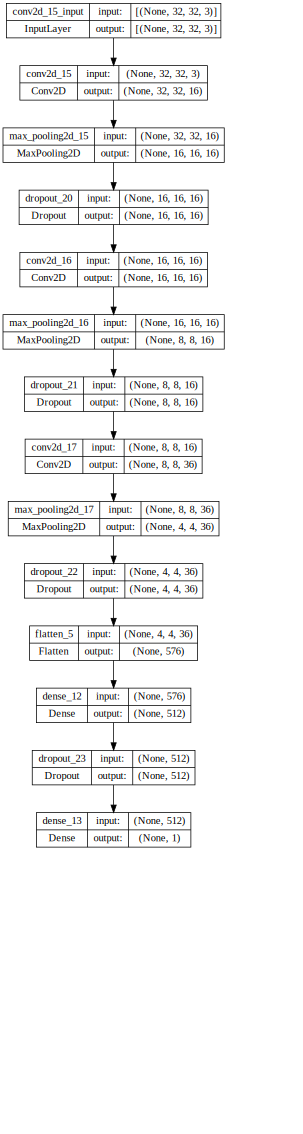

In [133]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Visualize the model using SVG
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


menggunakan library IPython untuk menampilkan visualisasi model neural network dengan menggunakan format SVG (Scalable Vector Graphics).

In [134]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6507936716079712


kode tersebut digunakan untuk mengevaluasi model neural network pada dataset uji (x_test dan y_test) setelah model tersebut dilatih. Hasil akurasi yang dicetak, dalam hal ini 0.6507936716079712, menunjukkan performa model pada dataset uji. Akurasi adalah proporsi dari prediksi yang benar terhadap total jumlah sampel dalam dataset uji. Dengan nilai akurasi sebesar 0.65 atau 65%, ini berarti model berhasil mengklasifikasikan dengan benar sekitar 65% dari total sampel dalam dataset uji.

In [135]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

 List ini memberikan label atau kategori yang sesuai dengan indeks tertentu. Dalam konteks ini, indeks 0 merepresentasikan label "Yes", dan indeks 1 merepresentasikan label "No".

Penggunaan labels seperti ini sangat berguna dalam konteks tugas klasifikasi biner, di mana kita memiliki dua kategori atau kelas yang mungkin, dan kita ingin menetapkan label yang dapat dimengerti oleh manusia untuk merepresentasikan hasil prediksi atau target. dalam hal ini adalah yes dan no

2/2 [==============================] - 0s 6ms/step


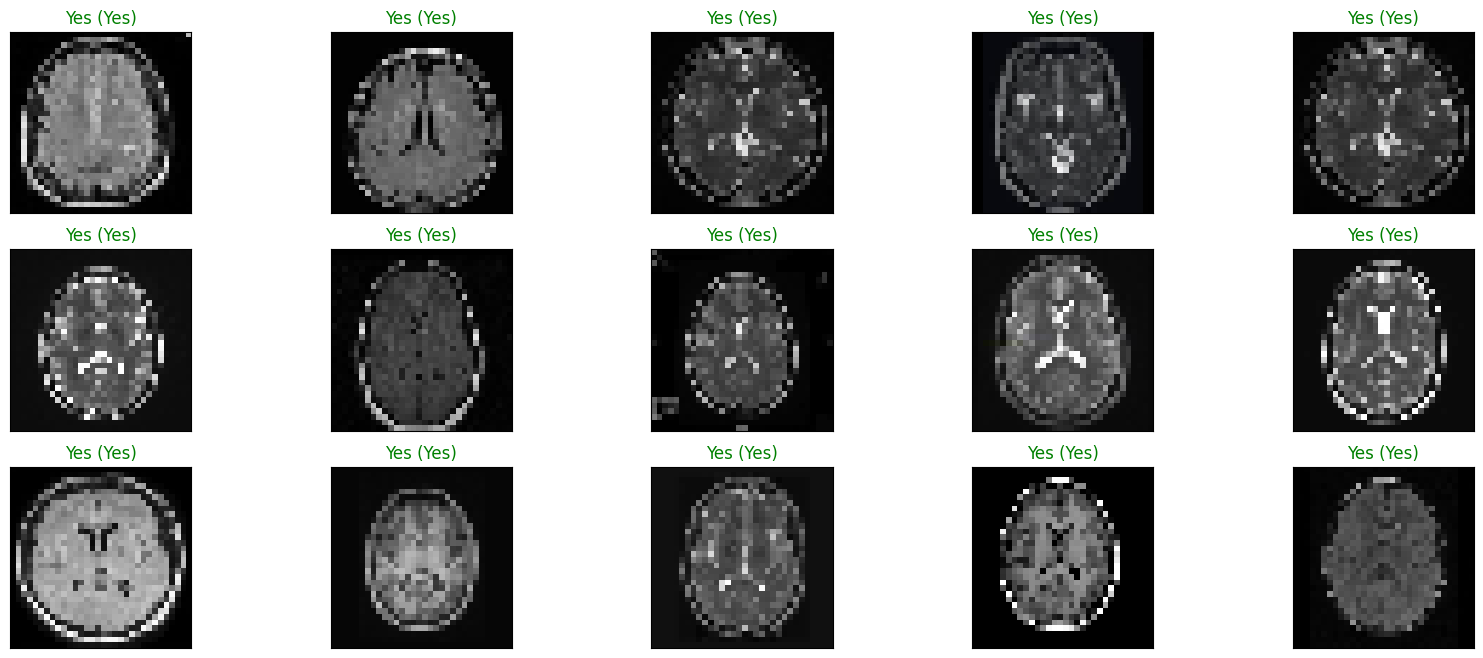

In [136]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()


Kode tersebut bertujuan untuk menampilkan hasil prediksi dari model neural network pada sejumlah sampel acak dari dataset uji. Pertama-tama, model melakukan prediksi pada dataset uji menggunakan metode predict, menghasilkan vektor probabilitas untuk setiap sampel. Selanjutnya, dengan menggunakan library matplotlib, kode ini membuat suatu gambar (figure) dengan subplot-subplot yang akan menampilkan sampel-sampel tersebut.

Dalam suatu loop, sebanyak 15 indeks acak dipilih dari dataset uji, dan untuk setiap indeks tersebut, sebuah subplot ditambahkan ke dalam gambar. Subplot ini kemudian diisi dengan gambar aktual dari dataset uji, dan prediksi serta ground truth dari sampel tersebut diambil untuk membentuk judul subplot.

Setiap subplot menampilkan gambar aktual bersama dengan prediksi model dan ground truth. Warna judul subplot diatur menjadi hijau jika prediksi model sesuai dengan ground truth, dan merah jika tidak sesuai.